In [1]:
import os
from tqdm import tqdm
import cv2
from random import shuffle
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.metrics import AUC, F1Score, Precision, Recall
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/image_data_apziva_project'

In [4]:
X = []
Z = []

flip = '/content/drive/MyDrive/image_data_apziva_project/images/training/flip'
notflip = '/content/drive/MyDrive/image_data_apziva_project/images/training/notflip'



In [5]:
def assign_label(image, position):
    return position




In [6]:
def create_train_data(position, dir):
    for img in tqdm(os.listdir(dir)):
        label = assign_label(img, position)
        path = os.path.join(dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))

        X.append(np.array(img))
        Z.append(str(label))


In [7]:
create_train_data('flipped', flip)
create_train_data('not flipped', notflip)


100%|██████████| 1230/1230 [01:09<00:00, 17.74it/s]


In [8]:
len(X)


2392

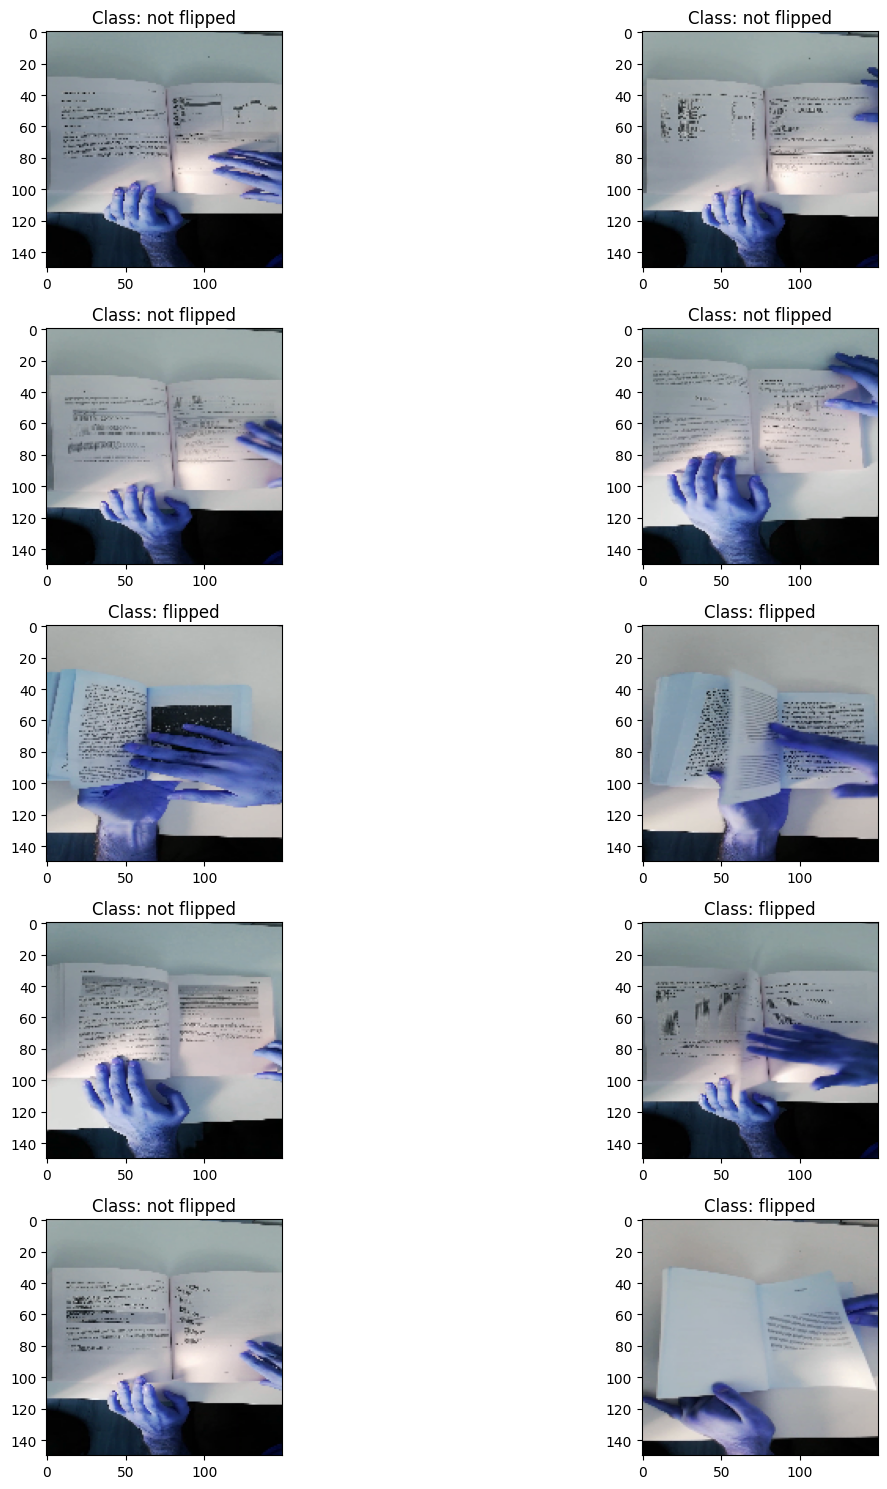

In [9]:
import random
fig, ax = plt.subplots(5,2)
fig.set_size_inches(15, 15)
for i in range(5):
  for j in range(2):
    l = random.randint(0, len(X))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Class: ' + Z[l])
plt.tight_layout()




In [10]:
encode = LabelEncoder()
Y = encode.fit_transform(Z)
Y = to_categorical(Y)


In [11]:
X = np.array(X)
Y = np.array(Y)

In [12]:
X = X/len(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)


In [14]:
y_train.shape



(1794, 2)

In [15]:
import tensorflow as tf



In [16]:
np.random.seed(1234)

random.seed(1234)

tf.random.set_seed(1234)



In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))






In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[F1Score()])



In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 128)       0

In [20]:
model.fit(X_train, y_train, epochs=10, batch_size=12, validation_data=(X_test, y_test))



Epoch 1/10
150/150 [==============================] - 12s 12ms/step - loss: 0.6958 - f1_score: 0.3797 - val_loss: 0.6931 - val_f1_score: 0.3341
Epoch 2/10
150/150 [==============================] - 1s 6ms/step - loss: 0.6934 - f1_score: 0.3703 - val_loss: 0.6933 - val_f1_score: 0.3341
Epoch 3/10
150/150 [==============================] - 1s 6ms/step - loss: 0.6392 - f1_score: 0.5898 - val_loss: 0.6259 - val_f1_score: 0.6462
Epoch 4/10
150/150 [==============================] - 1s 6ms/step - loss: 0.3870 - f1_score: 0.8361 - val_loss: 0.2479 - val_f1_score: 0.9063
Epoch 5/10
150/150 [==============================] - 1s 6ms/step - loss: 0.2476 - f1_score: 0.8978 - val_loss: 0.1969 - val_f1_score: 0.9193
Epoch 6/10
150/150 [==============================] - 1s 6ms/step - loss: 0.1839 - f1_score: 0.9319 - val_loss: 0.1484 - val_f1_score: 0.9464
Epoch 7/10
150/150 [==============================] - 1s 6ms/step - loss: 0.1500 - f1_score: 0.9475 - val_loss: 0.0808 - val_f1_score: 0.9816
Epoc

In [21]:
test_flipped = '/content/drive/MyDrive/image_data_apziva_project/images/testing/flip'
test_notflipped = '/content/drive/MyDrive/image_data_apziva_project/images/testing/notflip'


In [22]:
test = []
test_label = []

In [23]:
def create_test_data(position, dir):
    for img in tqdm(os.listdir(dir)):
        label = assign_label(img, position)
        path = os.path.join(dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))

        test.append(np.array(img))
        test_label.append(str(label))

In [24]:
create_test_data('flipped', test_flipped)
create_test_data('not flipped', test_notflipped)


100%|██████████| 307/307 [00:15<00:00, 19.74it/s]


In [25]:
test_label = encode.fit_transform(test_label)
test_label = to_categorical(test_label)



In [26]:
test = np.array(test)
test_label = np.array(test_label)



In [28]:
model.evaluate(test, test_label, batch_size=12)



50/50 [==============================] - 0s 4ms/step - loss: 4073.6851 - f1_score: 0.4999


[4073.68505859375, array([0.65989846, 0.3399015 ], dtype=float32)]